Tableau Dashboard Links:

- [Customer Transaction Comparison](https://public.tableau.com/app/profile/fernando.namora/viz/P0M1_fernando_namora/CustomerTransactionComparison)
- [Descriptive Statistics](https://public.tableau.com/app/profile/fernando.namora/viz/P0M1_fernando_namora/DescriptiveStatistics)
- [Inferential Statistics](https://public.tableau.com/app/profile/fernando.namora/viz/P0M1_fernando_namora/InferentialStatistics)

# i. Introduction

================================================= <br>
**Comparative Analysis of Credit Card Customer Transactions: Active vs Churned**

Name             : Fernando Namora <br>
Date Creation    : January 7, 2026

This notebook built to data exploration, preprocessing, and analyzing bank credit card customer churn dataset. <br>
================================================= <br>

# ii. Problem Statement and Dataset Description

Discussion topic to be analyze: **Comparative Analysis of Credit Card Customer Transactions: Active vs Churned**

Source of Dataset: [Kaggle](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers)

## Latar Belakang (Background of the Study)

A manager at the Bank is disturbed by more and more customers leaving their credit card services. The data analyst from the company is instructed to analyze the current customer dataset, including both customers who have churned and customers who are still active.

This credit card customers dataset is provides valuable insights into customer behavior and characteristics related to credit card usage and churn. Among the available variables, customer transaction activity is considered a key indicator of customer loyalty and engagement, reflects how actively customers use their credit cards in financial activities. In this study, customer transaction activity is specifically measured using total transaction amount over the last 12 months, which reflects the monetary value of customer engagement rather than transaction frequency.

In this study, the analysis mainly focuses on total transaction amounts over the last 12 months as the main metrics to compare between active and churned customers. In addition, transaction behavior is further observed across different card categories, to see how transaction patterns of each category. Demographic attributes such as age and gender are included as supporting variables and will be further used for interactive exploration on dashboard.

By analyzing historical data, this study aims to identify meaningful differences in transaction behavior between churned and active customers. The findings are expected to help stakeholders better understand customer engagement patterns and provide data-driven foundation for future decision and customer retention strategies.

## Problem Statement

We can define problem statement of this problem by using **SMART** framework:

- **Specific**: Analyze credit card churn by comparing total transaction amounts over the last 12 months between active and churned customers, with additional comparison across different card categories.

- **Measurable**: The analysis will use historical credit card customer data to measure differences in transaction distributions, average transaction amounts, and the statistical significance of average difference between active and churned customers.

- **Achievable**: The analysis is achievable since on the dataset contains complete information of transaction amounts over the last 12 months, customer churn status, and card category information.

- **Relevant**: This analysis is relevant to help the Bank understand customer transaction activity patterns and identify early signals of customer disengagement, which support data-driven customer retention strategies.

- **Time-bound**: The study analysis will be completed in one week.

Hence, the problem statement of this study is:

**Credit card customers of the Bank** will be analyzed to identify **differences in total transaction amounts over the last 12 months between active and churned customers**, including how these transaction patterns vary across **card categories**, through data-driven analysis within one week.

### Breakdown of Problem Statement

Breakdown of the problem statement above with 5W+1H:

1. How does the distribution of total transaction amounts over the last 12 months differ between active and churned customers? How does this distribution vary across different credit card categories?
2. What are the overall average transaction amounts of active and churned customers over the last 12 months?
3. Is the difference of overall average transaction amounts over the last 12 months of active and churned customers statistically significant?

> The questions above focus on understanding transaction behavior differences between active and churned customers. Additional filtering by age and gender is provided through interactive controls in the **Tableau** dashboard to support more specific exploratory analysis.

# iii. Data Loading

This section will do data loading from `.csv` to **DataFrame** to be explore further for analysis.

In [1]:
# import libraries and packages
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the dataset to dataframe
df = pd.read_csv('dataset.csv')

# inspect the dataset by see first 5 rows of the data
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Beside of the previous output, view of the first 5 rows of the dataset, we will also see the summary of the data with `info` method of DataFrame.

In [3]:
# see summary of the data with .info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

Note that the column `CLIENTNUM` represent the id of customer with other details on the reset 22 columns. In this case, we do not need clientnum, as we more focuses comparing between churn status `Attrition_Flag` column and use index of pandas instead.

> For this python notebook version we do not need `CLIENTNUM` column since we will use index of pandas instead. However, on **Tableau** we will use this column to represents identifier of each row

Above result from `df.info()` method informs that the dataset already cleaned from missing values (no missing values), with total 10127 rows. Also, the data type of each columns already well behave as each column represents should be.

Based on the source of the dataset directly ([Kaggle](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers)), note that from background of our study, the column we will use for further analysis only as below:
- `Attrition_Flag`: represents the customer status, whether attrited (churned) or not
- `Customer_Age`: represents the customer's age in years old
- `Gender`: represents the customer's gender
- `Card_Category`: represents type of credit card held by customer
- `Total_Trans_Amt`: represents the total transactions amount for the last 12 months

> Note that from the background of the study, we will use variable total transaction amount rather than total transaction count. Since we will be more interested to the amount which reflects the monetry value of customer engagement rather than transaction frequency.

From above selected columns, we will see unique values of categorical variables with `df.unique()` method:

In [4]:
# unique values of categorical variables with unique method

print('Unique values of Attrition Flag:')
print(df['Attrition_Flag'].unique())

print() # new line for space

print('Unique values of Gender:')
print(df['Gender'].unique())

print() # new line for space

print('Unique values of Card Category:')
print(df['Card_Category'].unique())

Unique values of Attrition Flag:
['Existing Customer' 'Attrited Customer']

Unique values of Gender:
['M' 'F']

Unique values of Card Category:
['Blue' 'Gold' 'Silver' 'Platinum']


We need to change the column name `Attrition_Flag` to `Churn_Status` and map the values of column to make it easier to understand to:

- `'Existing Customer'` -> `'Active'`
- `'Attrited Customer'` -> `'Churned'`

We will also see the basic measurement (such as minimum and maximum value) as basic foundation to see numerical variables with `df.describe()` method:

In [5]:
# basic summary of numerical variables

print(df[['Customer_Age', 'Total_Trans_Amt']].describe())

       Customer_Age  Total_Trans_Amt
count  10127.000000     10127.000000
mean      46.325960      4404.086304
std        8.016814      3397.129254
min       26.000000       510.000000
25%       41.000000      2155.500000
50%       46.000000      3899.000000
75%       52.000000      4741.000000
max       73.000000     18484.000000


> From above result basic summary of numerical variables, no numerical variables need to concerns such as negative value for age, negative total amount, etc.

The above exploration findings will be done on data cleaning process, on summary:

- Filter the dataset `df` by only selected columns specified previously
- Change column name `Attrition_Flag` -> `Churn_Status`
- Change column name `Total_Trans_Amt` -> `Total_Trans_Amt_Last_12mo` for readability of column meanings
- Map values of column `Churn_Status` to be `'Active'` and `'Churned'`

Additionally, to improve readability, we will also lower case all column names on the data cleaning process as well.

# iv. Data Cleaning

Since no missing values and data type of all columns already correct from the dataset source, we will handle a few cleaning process mentioned on **Data Exploration** step such as filter the dataset `df` and change the columns name for readability.

In [6]:
# filter the dataset use selected columns
df_analysis = df[[
    'Attrition_Flag',
    'Customer_Age',
    'Gender',
    'Card_Category',
    'Total_Trans_Amt']].copy() # use copy to prevet pandas warning

In [7]:
# change columns name
df_analysis.columns = [    
    'Churn_Status', # change this column name
    'Customer_Age',
    'Gender',
    'Card_Category',
    'Total_Trans_Amt_Last_12mo']

# map values of column Churn_Status
churn_map = {'Existing Customer':'Active', 'Attrited Customer':'Churned'} # map dictionary
df_analysis['Churn_Status'] = df_analysis['Churn_Status'].map(churn_map)

Finally, lower case all column names for readability:

In [8]:
df_analysis.columns = df_analysis.columns.str.lower()

# check summary of current condition of dataset
print(df_analysis.info())

# inspect the current condition of dataset
df_analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   churn_status               10127 non-null  object
 1   customer_age               10127 non-null  int64 
 2   gender                     10127 non-null  object
 3   card_category              10127 non-null  object
 4   total_trans_amt_last_12mo  10127 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 395.7+ KB
None


,churn_status,customer_age,gender,card_category,total_trans_amt_last_12mo
0,Active,45,M,Blue,1144
1,Active,49,F,Blue,1291
2,Active,51,M,Blue,1887
3,Active,40,F,Blue,1171
4,Active,40,M,Blue,816
...,...,...,...,...,...
10122,Active,50,M,Blue,15476
10123,Churned,41,M,Blue,8764
10124,Churned,44,F,Blue,10291
10125,Churned,30,M,Blue,8395


Above results end cleaning process of this dataset. Next, we will do exploration and analysis follows our breakthrough of problem statement earlier:

1. How does the distribution of total transaction amounts over the last 12 months differ between active and churned customers? How does this distribution vary across different credit card categories?
2. What are the overall average transaction amounts of active and churned customers over the last 12 months?
3. Is the difference of overall average transaction amounts over the last 12 months of active and churned customers statistically significant?

# v. Exploration and Analysis

All of the question to be analyze main focus is differentiation between churned and active customers, with consideration of below variable:

-> Total transaction amounts over the last 12 months (`total_trans_amt_last_12mo`)

With additional variation of card category (`card_category`)

> These 2 columns are the only columns will be use for visualization, and total transaction amount will be use for descriptive statistics, and inferential statistics. However, the rest columns `customer_age` and `gender` only for additional (not as a main focus of analysis based on our breakthrough analysis question) and will be use thoroughly with interactivity on **Tableau Dashboard** later

## Distribution Total Transaction Amount (Active vs Churned)

The original question breakthrough from problem statement earlier: <br>
> *"How does the distribution of total transaction amounts over the last 12 months differ between active and churned customers?"*

That means we will compare distribution of `total_trans_amt_last_12mo` by comparison of `active` and `churned` customer.

Additional question of this question part is *"How does this distribution vary across different credit card categories?"*. <br>
We will additionally compare for each card category (`card_category`) as well later.

---

First, we will **compare the distribution** of total transaction amount last 12 months for active and churned customer. There may some question arise such as: Is the distribution the same or similar? Is there outlier of transaction amount either for active or churned customer?

For this question we may able see with visualization with **histogram**, the plot of the count each total transaction amount, to see the distribution, separated for active and churned customer.

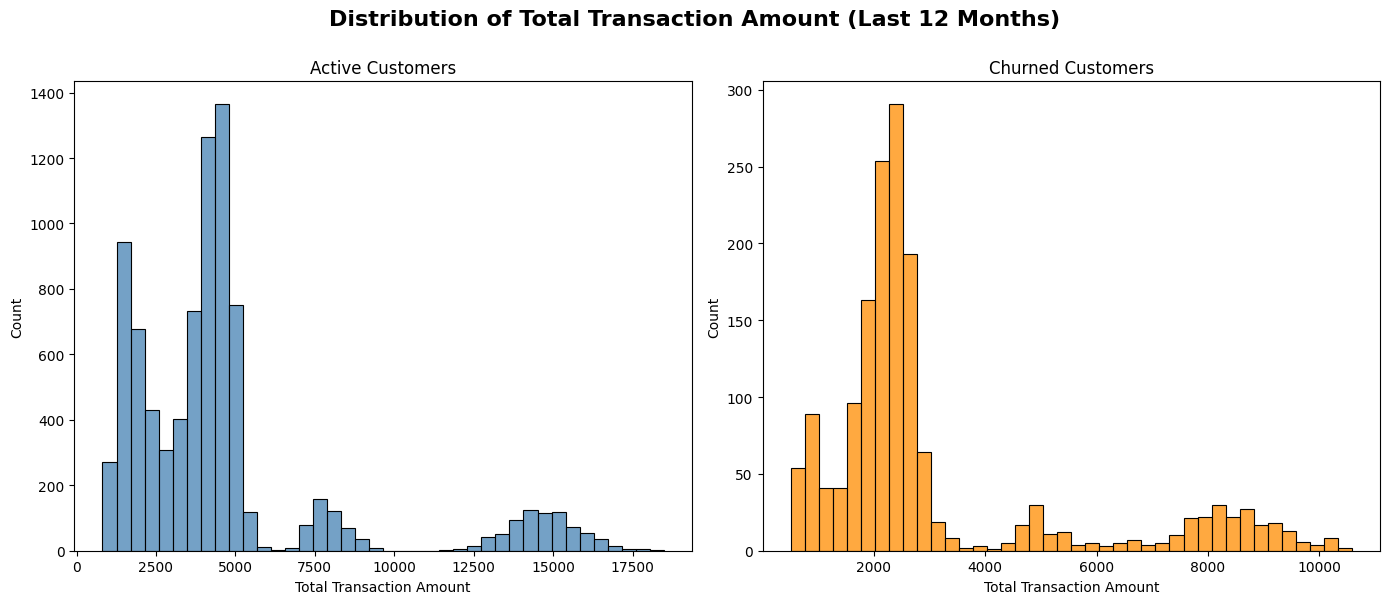

In [9]:
# create 2 plot figure
fig, axes = plt.subplots(ncols=2,figsize=(14,6))

# filter data to separate active and churned
df_active = df_analysis[df_analysis['churn_status'] == 'Active']
df_churned = df_analysis[df_analysis['churn_status'] == 'Churned']


# use seaborn histplot method

# left plot: active customers
sns.histplot(data = df_active,
             x = 'total_trans_amt_last_12mo',
             bins = 40,  # use 40 bars
             ax = axes[0],  # plot on the left for active
             color = 'steelblue'
)

# set title and x label of left plot
axes[0].set_xlabel('Total Transaction Amount')
axes[0].set_title('Active Customers')


# right plot: churned customers
sns.histplot(data = df_churned,
             x = 'total_trans_amt_last_12mo',
             bins = 40,  # use 40 bars
             ax = axes[1],  # plot on the right for churned
             color = 'darkorange'
)

# set title and x label of right plot
axes[1].set_xlabel('Total Transaction Amount')
axes[1].set_title('Churned Customers')


# set overall title on the top
fig.suptitle(
    'Distribution of Total Transaction Amount (Last 12 Months)',
    fontsize = 16, # set the font size of sup-title
    fontweight = 'bold', # set the main title - bold style
    y = 1 # set space between sup-title and the title of each subplot
)

plt.tight_layout() # for tight layout
plt.show() # to show the plot


Based on above visualization, the shape of distribution looks similar. From the shape of both active and churn customers, these distribution of total transaction amount for the last 12 months does not looks follows normal distribution. The distribution more concentrated on the lower range, this indicates some outliers on the upper range but the more common transaction amount should be on lower amount. 

Also from the right heavy tail seen on the distribution, this indicates positive skewness and may the kurtosis shape leptokurtic. The positive skewness of both groups means that just some of limited people have total transaction amount high (relative of each group).

> Outliers are retained in this analysis since they represent valid high-transaction customers and relevant for understanding customer behavior to know patterns behind churn status. The scope main point of this analysis is to know the difference in transactions behavior between active and churned customers.

---

Aside from the distribution shape of both active and churn customers, we may also want to compare **how differs are the amount** of total transaction amount (last 12 months) of both groups, group of active and churned customers. Note that previously mentioned that both groups have positive skew, some of limited people have high total transaction amount for the last 12 months. The indicator *high* only for each group perpective (since relative). High total transaction for churned customers that considered as the outlier, may only treated usual and many people have this amount for active customers.

We can use **boxplot** to see the distribution (spreadness) for both groups, but able to see the key numerical summarize data (central tendency) as well to see differentiation from amount compare for both groups.

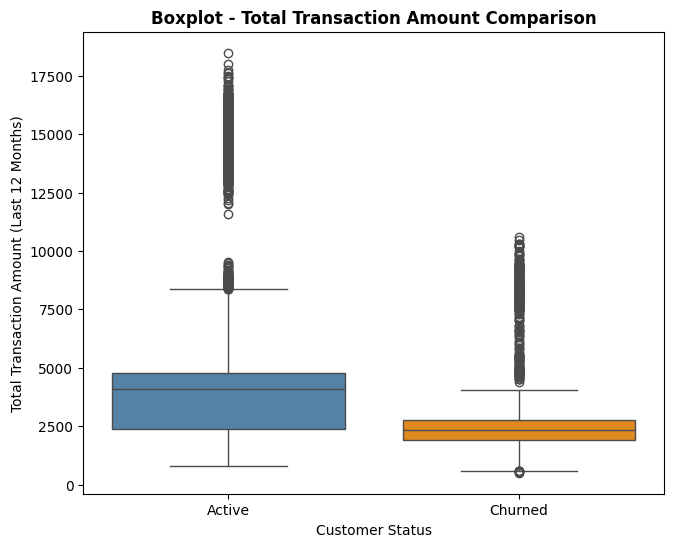

In [10]:
# set figure size of the plot first
plt.figure(figsize=(7.5, 6))

# use seaborn boxplot method
sns.boxplot(
    data = df_analysis,                     # use overall data
    x = 'churn_status',                     # compare for both group - active and churned 
    y = 'total_trans_amt_last_12mo',        # comparation variable - total transaction amount last 12 months
    palette = ['steelblue', 'darkorange'],  # set the color follow previous histplot
    hue = 'churn_status',                   # to prevent seaborn warning for using palette
    legend = False                          # to prevent seaborn warning for using palette but not as a legend
)

plt.title('Boxplot - Total Transaction Amount Comparison',
          fontweight = 'bold' # for title font bold
)
plt.xlabel('Customer Status') # set x label readability name
plt.ylabel('Total Transaction Amount (Last 12 Months)') # set y label readability name

plt.show() # to show the plot

Above boxplot visualization follows our previous findings:

- Distribution (shape) for both groups looks the same
- Both groups have positive skewness of distribution
- Both groups have some outliers on the upper ranges

However, with above boxplot visualization we also have new findings:
1. **Median** for active customers > churn customers
2. **Q3** of active customers > Q3 of churn customers
3. **Q1** of active customers > Median of Churn Customers

With new findings based on above boxplot, we can clearly seen that the amount difference between active and churned customers really differs for the total transaction amount last 12 months. This means that even if the shape alike for both groups but the numerical key for both groups such as average, median, Q1, Q3 may be so differs. We will confirm this by see the number on the 2nd question later.

> Note that, boxplot visualization earlier does not exhibit the average value comparison between two groups. We will calculate this on the section for 2nd question later as well.

Before calculate the overall measurement such as average, median, Q1, and Q3. First, we will compare the distribution vary across card category by visualization firstly.

### Distribution Transaction Amount across Card Category

We will compare the distribution of total transaction amounts for each card category by visualization histogram. Since we are more focus on total transaction amount variable (rather than card category), we will only do visualization to depict from general view rather than more complex analysis. Earlier there are 4 card category that is `'Blue'`, `'Silver'`, `'Gold'`, `'Platinum'`.

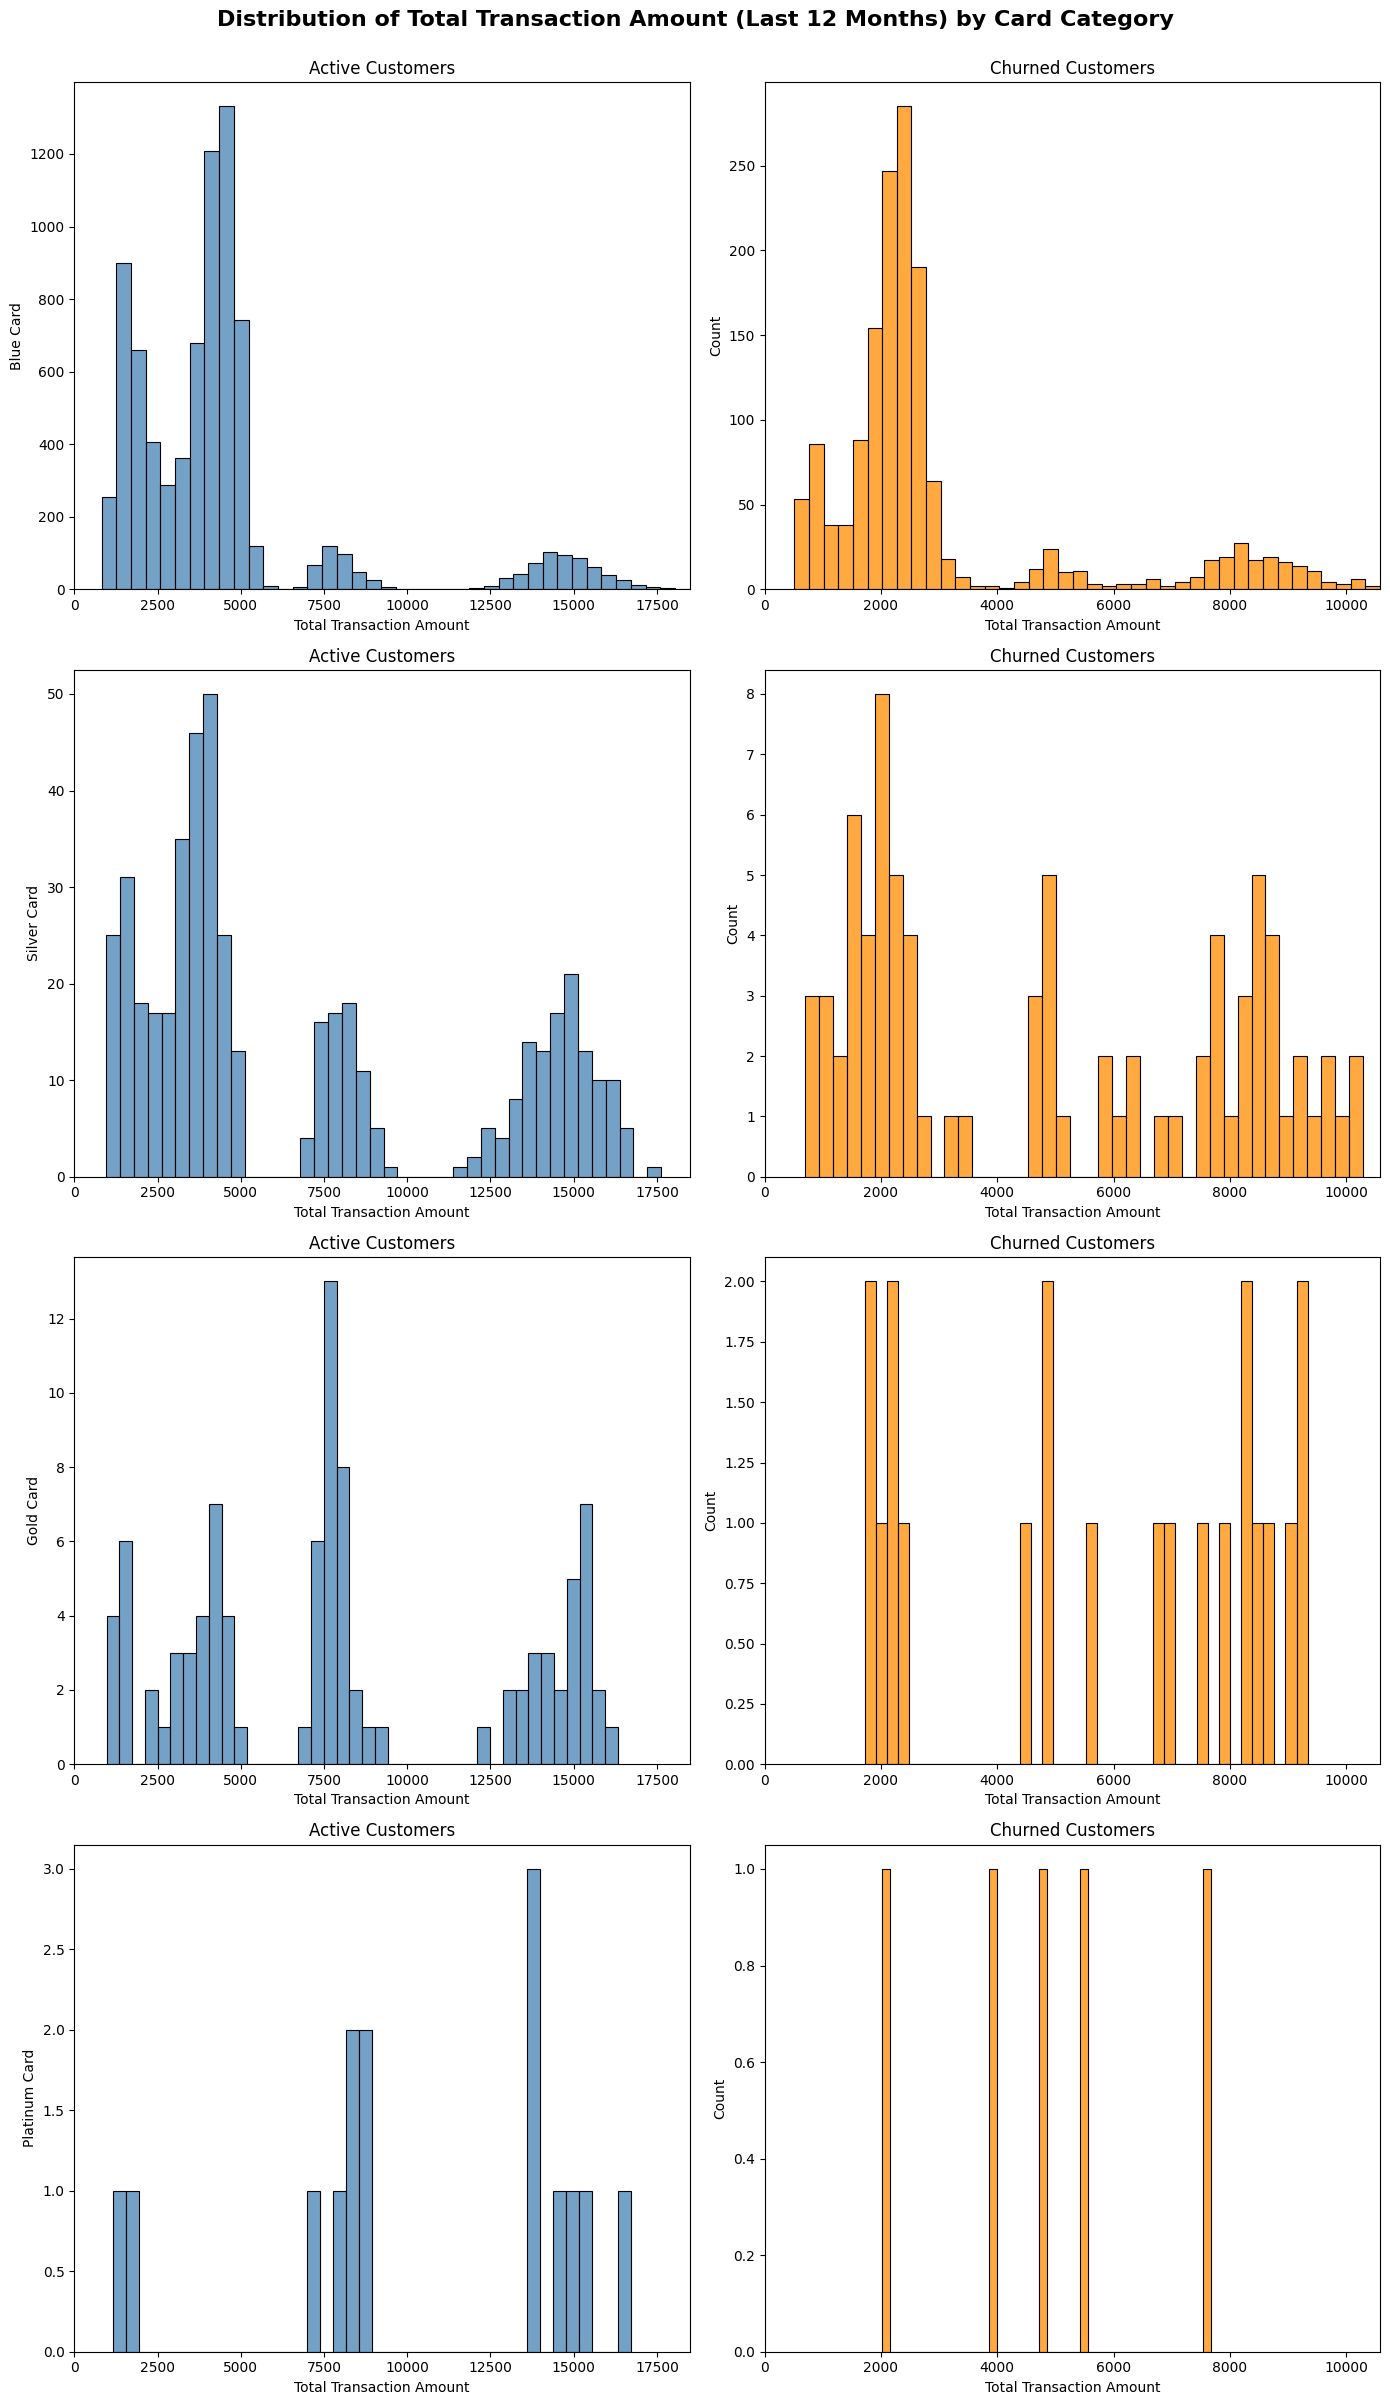

In [11]:
# create 4 x 2 plot figure (4 rows, 2 columns)
fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(14,24)) # the height 4 times bigger

# filter data to separate active and churned
## filter data to separate each card category as well

## blue card
df_active_blue = df_analysis[(df_analysis['churn_status'] == 'Active') & (df_analysis['card_category'] == 'Blue')]
df_churned_blue = df_analysis[(df_analysis['churn_status'] == 'Churned') & (df_analysis['card_category'] == 'Blue')]

## silver card
df_active_silver = df_analysis[(df_analysis['churn_status'] == 'Active') & (df_analysis['card_category'] == 'Silver')]
df_churned_silver = df_analysis[(df_analysis['churn_status'] == 'Churned') & (df_analysis['card_category'] == 'Silver')]

## gold card
df_active_gold = df_analysis[(df_analysis['churn_status'] == 'Active') & (df_analysis['card_category'] == 'Gold')]
df_churned_gold = df_analysis[(df_analysis['churn_status'] == 'Churned') & (df_analysis['card_category'] == 'Gold')]

## platinum card
df_active_platinum = df_analysis[(df_analysis['churn_status'] == 'Active') & (df_analysis['card_category'] == 'Platinum')]
df_churned_platinum = df_analysis[(df_analysis['churn_status'] == 'Churned') & (df_analysis['card_category'] == 'Platinum')]


# since we want to compare across card category, we will let the x fix same as previous histogram
# global x-axis limit (without card category filter)
xmax_active = df_active['total_trans_amt_last_12mo'].max()
xmax_churned = df_churned['total_trans_amt_last_12mo'].max()


# use seaborn histplot method

## blue card
### left plot: active customers
sns.histplot(data = df_active_blue, # blue card data
             x = 'total_trans_amt_last_12mo',
             bins = 40,  # use 40 bars
             ax = axes[0, 0],  # plot on the left for active
             color = 'steelblue'
)
### set title, x and y label of left plot
axes[0, 0].set_xlabel('Total Transaction Amount')
axes[0, 0].set_title('Active Customers')
axes[0, 0].set_ylabel('Blue Card')


### right plot: churned customers
sns.histplot(data = df_churned_blue, # blue card data
             x = 'total_trans_amt_last_12mo',
             bins = 40,  # use 40 bars
             ax = axes[0, 1],  # plot on the right for churned
             color = 'darkorange'
)
### set title and x label of right plot
axes[0, 1].set_xlabel('Total Transaction Amount')
axes[0, 1].set_title('Churned Customers')

### limit x axis
axes[0, 0].set_xlim(0, xmax_active)
axes[0, 1].set_xlim(0, xmax_churned)


## silver card
### left plot: active customers
sns.histplot(data = df_active_silver, # silver card data
             x = 'total_trans_amt_last_12mo',
             bins = 40,  # use 40 bars
             ax = axes[1, 0],  # plot on the left for active
             color = 'steelblue'
)
### set title, x and y label of left plot
axes[1, 0].set_xlabel('Total Transaction Amount')
axes[1, 0].set_title('Active Customers')
axes[1, 0].set_ylabel('Silver Card')


### right plot: churned customers
sns.histplot(data = df_churned_silver, # silver card data
             x = 'total_trans_amt_last_12mo',
             bins = 40,  # use 40 bars
             ax = axes[1, 1],  # plot on the right for churned
             color = 'darkorange'
)
### set title and x label of right plot
axes[1, 1].set_xlabel('Total Transaction Amount')
axes[1, 1].set_title('Churned Customers')

### limit x axis
axes[1, 0].set_xlim(0, xmax_active)
axes[1, 1].set_xlim(0, xmax_churned)


## gold card
### left plot: active customers
sns.histplot(data = df_active_gold, # gold card data
             x = 'total_trans_amt_last_12mo',
             bins = 40,  # use 40 bars
             ax = axes[2, 0],  # plot on the left for active
             color = 'steelblue'
)
### set title, x and y label of left plot
axes[2, 0].set_xlabel('Total Transaction Amount')
axes[2, 0].set_title('Active Customers')
axes[2, 0].set_ylabel('Gold Card')


### right plot: churned customers
sns.histplot(data = df_churned_gold, # gold card data
             x = 'total_trans_amt_last_12mo',
             bins = 40,  # use 40 bars
             ax = axes[2, 1],  # plot on the right for churned
             color = 'darkorange'
)
### set title and x label of right plot
axes[2, 1].set_xlabel('Total Transaction Amount')
axes[2, 1].set_title('Churned Customers')

### limit x axis
axes[2, 0].set_xlim(0, xmax_active)
axes[2, 1].set_xlim(0, xmax_churned)


## platinum card
### left plot: active customers
sns.histplot(data = df_active_platinum, # platinum card data
             x = 'total_trans_amt_last_12mo',
             bins = 40,  # use 40 bars
             ax = axes[3, 0],  # plot on the left for active
             color = 'steelblue'
)
### set title, x and y label of left plot
axes[3, 0].set_xlabel('Total Transaction Amount')
axes[3, 0].set_title('Active Customers')
axes[3, 0].set_ylabel('Platinum Card')


### right plot: churned customers
sns.histplot(data = df_churned_platinum, # platinum card data
             x = 'total_trans_amt_last_12mo',
             bins = 40,  # use 40 bars
             ax = axes[3, 1],  # plot on the right for churned
             color = 'darkorange'
)
### set title and x label of right plot
axes[3, 1].set_xlabel('Total Transaction Amount')
axes[3, 1].set_title('Churned Customers')

### limit x axis
axes[3, 0].set_xlim(0, xmax_active)
axes[3, 1].set_xlim(0, xmax_churned)


# set overall title on the top
fig.suptitle(
    'Distribution of Total Transaction Amount (Last 12 Months) by Card Category',
    fontsize = 16, # set the font size of sup-title
    fontweight = 'bold', # set the main title - bold style
    y = 1 # set space between sup-title and the title of each subplot
)

plt.tight_layout() # for tight layout
plt.show() # to show the plot

> In this python notebook, visualization above shown variation across all card categories. However, on Tableau there is interactive option to choose multiple values card category (only selected categories) to be shown.

Based on the visualization above, the distribution of total transaction amount across card categories as below:

- For **Blue card customers**, which have the most customers, both active and churned customers groups show a heavy positive skew distribution (same as overall histogram of total transaction amount active and churned earlier). Both active and churned customers, most transactions are concentrated in the lower transaction range (lower and upper respective for each customer group), only a smaller portion of customers contributes to significantly higher transaction amounts. Both active and churned customers have visually similar distribution (respective for each group). Between all card, these blue card customers exhibit almost the same as earlier (without card category filter), that means the blue card more represents of customer in general to explaining total transaction amounts.

- For **Silver card customers**, which have the second most customers, the distribution pattern remains heavy positive skew distribution for both active and churned customers. Active silver card customers still have slightly higher transaction amounts and wider distribution than churned customers, although the differences less noticeable compare to blue card customers distributions. While transaction activity still differs between the two groups, the difference is relatively smaller than blue card customers. Nonetheless, the distribution of both active and churned customers have visually similar distribution (respective for each group) depict similar behavior with blue card customers.

- For **Gold card customers**, the transaction distributions become more sparse and gaps due to smaller sample size. Although active gold card customers have slightly higher transaction amounts and wider distribution than churned customers. The differences amount between active and churned customers becomes less noticeable compare to silver card customers. This means the higher card level, the less noticable differences of total transaction amounts between active and churned customers. We may not able further analyze due to small sample size, need supports of higher sample size to gain more insight of this gold card customers.

- Lastly, **Platinum card customers** show the most limited number of observations, especially churned customers. We are not able to really analyze the distribution, but still compare between active and churned customers. Same as other card, active customers with platinum card has higher transaction amount and wider distribution than churned customers.

Overall, across all card categories, active customers still show higher transactions amounts and wider distributions compared to churned customers, following behaviour of overall data without limitation of each card category (our limitation of x axis same as previous histogram without card category filter have impact here). In general the distribution shape remains high positive skew in both groups, but for some group the spread is a slightly differs and less noticeable of differences between both groups. This indicates that card category have slightly influence of transaction behavior that referring to customer retention behavior (churned status).

---

Previous result ends our comparison by visualization only. Next, we will move to the 2nd and 3rd question that more focus on overall average of total transaction amounts over the last 12 months. Then compare it between active and churned customers.

## Descriptive Statistics of Total Transaction Amount

The original question breakthrough from problem statement earlier: <br>
> *"What are the overall average transaction amounts of active and churned customers over the last 12 months?"*

To answer this question, we can calculate **Mean** of `total_trans_amt_last_12mo` calculated for each groups (recall that we have `df_active` and `df_churned` earlier that separate between active and churned customers). We may as well calculate measure such as **Median**, **Q1**, and **Q3** to confirm our previous findings on boxplot visualization.

First, calculate the median, Q1, and Q3:

In [12]:
# calculate the median, q1, and q3 of each group
med_trans_a = df_active['total_trans_amt_last_12mo'].quantile(0.5) # median = Q2 = 50th percentile
q1_trans_a = df_active['total_trans_amt_last_12mo'].quantile(0.25) # Q1 = 25th percentile
q3_trans_a = df_active['total_trans_amt_last_12mo'].quantile(0.75) # Q3 = 75th percentile
med_trans_c = df_churned['total_trans_amt_last_12mo'].quantile(0.5)
q1_trans_c = df_churned['total_trans_amt_last_12mo'].quantile(0.25)
q3_trans_c = df_churned['total_trans_amt_last_12mo'].quantile(0.75)


print('Comparison of Customer Total Transaction Amount (Last 12 Months):')
print() # new line to separate

print(f'Median for active customers: {med_trans_a:.2f}')
print(f'Median for churned customers: {med_trans_c:.2f}')
print() # new line to separate

print(f'Q1 for active customers: {q1_trans_a:.2f}')
print(f'Q1 for churned customers: {q1_trans_c:.2f}')
print() # new line to separate

print(f'Q3 for active customers: {q3_trans_a:.2f}')
print(f'Q3 for churned customers: {q3_trans_c:.2f}')

Comparison of Customer Total Transaction Amount (Last 12 Months):

Median for active customers: 4100.00
Median for churned customers: 2329.00

Q1 for active customers: 2384.75
Q1 for churned customers: 1903.50

Q3 for active customers: 4781.25
Q3 for churned customers: 2772.00


Above outputs, can be seen more clear by below table (since Median = Q2) :

|    |Active|Churned|
|---|---|---|
|Q1|2384.75|1903.50|
|Q2|4100.00|2329.00|
|Q3|4781.25|2772.00|

Based on above results, we can see each number **mean**, **median**, **Q1**, and **Q3** of total transaction amount for the last 12 months, of each active and churned customers. 

From the number, our findings based on boxplot visualization earlier confirmed that:

1. **Median** for active customers > churn customers
2. **Q3** of active customers > Q3 of churn customers
3. **Q1** of active customers > Median of Churn Customers

These numbers confirm that some outliers in the churned customer group on the upper range are considered normal transaction amounts for active customers. Active customers tend to have higher transaction activities than churned customers. Hence, total transaction amount is the good metric to represent loyalty level of customer. We can approach some active customers with lower levels amount of total transaction to prevent them to be churned status.

For clear view average comparison of total transaction amount over the last 12 months between two groups (active and churned customers):

Average value for active customers: 4654.66
Average value for churned customers: 3095.03



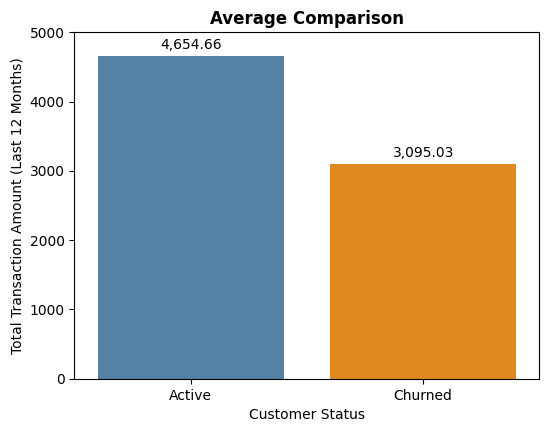

In [13]:
# calculate the mean of total transaction amount
# of each group - active and churned
mean_trans_a = df_active['total_trans_amt_last_12mo'].mean()
mean_trans_c = df_churned['total_trans_amt_last_12mo'].mean()

print(f'Average value for active customers: {mean_trans_a:.2f}') # formatted print 2 number behind decimal
print(f'Average value for churned customers: {mean_trans_c:.2f}') # formatted print 2 number behind decimal
print() # new line to separate


# set figure size of the plot first
plt.figure(figsize=(6, 4.5))

# use seaborn barplot method
sns.barplot(
    data = df_analysis,                     # use overall data
    x = 'churn_status',                     # compare for both group - active and churned 
    y = 'total_trans_amt_last_12mo',        # comparation variable - total transaction amount last 12 months
    palette = ['steelblue', 'darkorange'],  # set the color follow previous histplot
    hue = 'churn_status',                   # to prevent seaborn warning for using palette
    legend = False,                         # to prevent seaborn warning for using palette but not as a legend
    errorbar = None                         # to hide error bar
)
# by default, estimator of barplot is mean - the average value


# add label for mean of active customers
plt.annotate('4,654.66', # text
             xy=(0, 4654.66), # coordinate for label
             xytext=(0,5), # coordinate for text
             textcoords='offset points', # offset, in points, from the xy value
             ha='center') # horizontal alignment on the center

# add label for mean of churned customers
plt.annotate('3,095.03', # text
             xy=(1, 3095.03), # coordinate for label
             xytext=(0,5), # coordinate for text
             textcoords='offset points', # offset, in points, from the xy value
             ha='center') # horizontal alignment on the center


# change y-axis range of figure
plt.ylim(0, 5000)

# styling for title
plt.title('Average Comparison',
          fontweight = 'bold' # for title font bold
)
plt.xlabel('Customer Status') # set x label readability name
plt.ylabel('Total Transaction Amount (Last 12 Months)') # set y label readability name

plt.show() # to show the plot

The average total transaction amount over the last 12 months of active customers is **4654.66**, and for churned customers is **3095.03**. From the numbers itself, it is clearly seen that the averages differs with pretty high numbers. However, we can further analyze whether the average transaction of these 2 groups really differs significantly or not. Next step is to analyze this matter with statistical evidence, this also the part of the 3rd question.

> Note that since outlier persists on the distribution, the mean value is impacted by this. Hence, the median also shown earlier for more representative measure of distribution differences in this transactions data.

## The Average Significantly Different?

The original question breakthrough from problem statement earlier: <br>
> *"Is the difference of overall average transaction amounts over the last 12 months of active and churned customers statistically significant?"*

Note that, between two groups: active and churned customers, each group represent current condition of each customer (represented by `CLIENTNUM` earlier before truncation of column). The data itself not represent of transaction amount of the **different** customer that still active and already churned instead of the data of same customer before churn vs after churn. Hence, we will use **two sample independent test** for hypothesis testing.

H0: **There is no significant difference between the means** of total transaction amounts (last 12 months) of active and churned customers<br>
H1: **There is a significant difference between the means** of total transaction amounts (last 12 months) of active and churned customers

Or we can say as below:

**H0: μ1 = μ2** <br>
**H1: μ1 ≠ μ2**

where μ1 and μ2 are the means of total transaction amounts (last 12 months) of active customers and churned customers, respectively.

In [14]:
# perform independent two sample t-test to compare active and churned customers
# recall we have df_active and df_churned earlier filtered of active and churned customers
t_stat, p_val = stats.ttest_ind(df_active['total_trans_amt_last_12mo'], 
                                df_churned['total_trans_amt_last_12mo']
)
print('T-Statistic:', t_stat) # t-test statistic value
print('P-value:', p_val) # probability of observing this difference by chance

T-Statistic: 17.21126707715907
P-value: 1.857438655660998e-65


> T-Statistic > 0 means the first group (active customers) higher than second group (churned customers), and this result indeed since previously comparison of average of both group.

Since p-value is less than 0.05, we reject null hypothesis. That means, the average value of total transaction amount over the last 12 months between active and churned customers are significantly differs with statistical evidence.

The result follows naturally, since total transaction amount of churned customers pretty low compare to active customers. Now we know the behavioral of churned customers are have pretty low amount of transaction compare to active customers. Indeed we may suggest the plan to approach some active customers with lower levels amount of total transaction to prevent them entering churned status.

Even though the statistical test shows a significant difference between active and churned customers, statistical significance does not always mean the difference is large. From the histogram, boxplot, and average comparison previously, active customers always show higher total transaction amounts over the last 12 months. However, based on visual analysis alone, we cannot confirm whether this difference is statistically significant. The t-test result support these visual findings and confirm, now we can confirms the difference by data-driven evidence.

# vi. Conclusion

After previous analysis that has been done earlier, the key findings answer the breakdown of our problem statement earlier as below:

1. How does the distribution of total transaction amounts over the last 12 months differ between active and churned customers?
 How does this distribution vary across different credit card categories?

> From visual inspection, both active and churned customers show outliers on high transaction amount, with many outlier values concentrated on the upper range. Visually, even across different credit card categories, it can be seen that active customers have higher transaction amounts compare to churned customers. However, we need to confirm this findings with data-driven evidence.

2. What are the overall average transaction amounts of active and churned customers over the last 12 months?

> The average transaction amounts over the last 12 months of active customers is 4654.66, which is higher than the average of churned customers that is 3095.03.

3. Is the difference of overall average transaction amounts over the last 12 months of active and churned customers statistically significant?

> From the two sample independent test results, the average value of total transaction amount over the last 12 months between active and churned customers are significantly different. Even though the statistical test shows a significant difference, statistical significance does not always mean the difference is large. The t-test result support visual findings earlier from the histogram, boxplot, and average comparison, to finally confirms the difference based on data-driven evidence.

Above results summarize our analysis findings to know the patterns and characteristics related to credit card usage and churn. The analysis has been done by comparison of the main metric, the total transaction amounts between active and churned customers, including additional comparison across card categories, the overall average value comparison of total transaction between active and churned customers, and the statistical inferential to confirms the difference is significant. These results of this analysis can serve as a foundation for future customer retention strategies, which types of customers need to be approached further in order to prevent them entering churn status.